In [ ]:
from google.colab import files 
import pandas as pd 
import io
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
uploaded = files.upload()
dafram = pd.read_excel(io.BytesIO(uploaded['Mahasiswa.xls']))
data = []

for i in range(len(dafram)):
  data.append([dafram['Id'][i],dafram['Penghasilan'][i],dafram['Penghasilan'][i]-dafram['Pengeluaran'][i]])


Saving Mahasiswa.xls to Mahasiswa (1).xls


Membership

In [ ]:
def inclow(x):
  a = 3
  b = 8
  if x <= a:
    return 1
  elif x > b:
    return 0
  elif x > a and x <= b:
    return (b-x)/(b-a)

def incavg(x):
  a = 3
  b = 16.6
  c = 9
  d = 14
  if x <= a or x > b:
    return 0
  elif x > a and x <= c:
    return (x-a)/(c-a)
  elif x > c and x <= d:
    return 1
  elif x > d and x <= b:
    return (b - x) / (b - d)

def inchigh(x):
  a = 14.5
  b = 17.99
  if x <= a:
    return 0
  elif x > b:
    return 1
  elif x > a and x <= b:
    return (x - a) / (b - a)


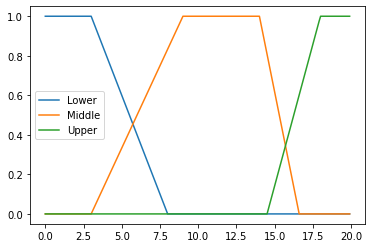

In [ ]:
#grafik income 
plotGrafik = np.arange(0, 20, 0.1)
plt.plot(plotGrafik,[inclow(x) for x in plotGrafik], label = 'Lower')
plt.plot(plotGrafik,[incavg(x) for x in plotGrafik], label = 'Middle')
plt.plot(plotGrafik,[inchigh(x) for x in plotGrafik], label = 'Upper')
plt.legend()

In [49]:
def dikit(x):
  p = 0
  q = 3
  if x <= 0:
    return 1
  elif x > p and x <= q:
    return (q - x)/(q - p)
  elif (x > q):
    return 0

def cukup(x):
  p = 0
  q = 3
  r = 8.90
  s = 6
  if x <= p or x > r:
    return 0
  elif x > p and x <= q:
    return (x - p)/(q - p)
  elif x > q and x <= s:
    return 1
  elif x > s and x <= r:
    return (r - x)/(r - s)
def banyak(x):
  t = 6.5 
  r = 8.90
  if x > r :
    return 1
  elif x > t and x <= r:
    return (x - t)/(r - t)
  elif x <= t:
    return 0


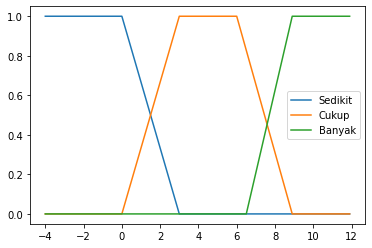

In [50]:
plotGrafik = np.arange(-4, 12, 0.1)
plt.plot(plotGrafik, [dikit(x) for x in plotGrafik], label = 'Sedikit')
plt.plot(plotGrafik,[cukup(x) for x in plotGrafik], label = 'Cukup')
plt.plot(plotGrafik,[banyak(x) for x in plotGrafik], label = 'Banyak')
plt.legend()

Fuzzification

In [51]:
incoming = []
residual = []

for i in range(100):
  incoming.append([data[i][0],inclow(data[i][1]),incavg(data[i][1]),inchigh(data[i][1])])
  residual.append([data[i][0],dikit(data[i][2]),cukup(data[i][2]),banyak(data[i][2])])


 RULE







| INCOME | RESIDUAL | SCORE? |
| --- | --- | --- |
| HIGH | BANYAK | REJECTED  |
| HIGH | CUKUP | REJECTED |
| HIGH | SEDIKIT | CONSIDERED |
| AVERAGE | BANYAK | REJECTED |
| AVERAGE | CUKUP | CONSIDERED |
| AVERAGE | SEDIKIT | ACCEPETED |
| LOW | BANYAK | CONSIDERED |
| LOW | CUKUP | CONSIDERED |
| LOW | SEDIKIT | ACCEPTED |

In [66]:
inferensi = []
for i in range(100):
  accepted = []
  considered = []
  rejected = []

  accepted.append(min(incoming[i][1], residual[i][1]))
  accepted.append(min(incoming[i][2], residual[i][1]))
  
  considered.append(min(incoming[i][3], residual[i][2]))
  considered.append(min(incoming[i][2], residual[i][2]))
  considered.append(min(incoming[i][1], residual[i][2]))
  considered.append(min(incoming[i][1], residual[i][3]))
  considered.append(min(incoming[i][3], residual[i][1]))

  rejected.append(min(incoming[i][3], residual[i][3]))
  rejected.append(min(incoming[i][2], residual[i][3]))
  rejected.append(min(incoming[i][3], residual[i][2]))

  yes = max(accepted)
  waiting = max(considered)
  no = max(rejected)

  inferensi.append([data[i][0], yes, waiting, no])


Defuzzification

In [67]:
#menggunakan metode sugeno 
kriteria = []

for i in range(100):
  kriteria.append([data[i][0], ((inferensi[i][1]*30) + (inferensi[i][2]*75) + (inferensi[i][3]*100)) / ((inferensi[i][1]) + (inferensi[i][2]) + (inferensi[i][3]))])
kriteria

[[1, 100.0],
 [2, 75.0],
 [3, 87.5],
 [4, 30.0],
 [5, 100.00000000000001],
 [6, 90.83656080557707],
 [7, 30.0],
 [8, 100.0],
 [9, 87.5],
 [10, 100.0],
 [11, 30.000000000000004],
 [12, 75.0],
 [13, 30.0],
 [14, 75.0],
 [15, 100.0],
 [16, 69.15000000000002],
 [17, 87.49999999999999],
 [18, 85.90689541612433],
 [19, 75.0],
 [20, 100.0],
 [21, 82.7498905809022],
 [22, 100.0],
 [23, 75.0],
 [24, 100.0],
 [25, 30.0],
 [26, 75.0],
 [27, 100.0],
 [28, 100.0],
 [29, 87.5],
 [30, 100.0],
 [31, 100.0],
 [32, 93.14812996956907],
 [33, 30.0],
 [34, 100.0],
 [35, 100.0],
 [36, 77.71720613287904],
 [37, 75.0],
 [38, 30.0],
 [39, 75.0],
 [40, 87.5],
 [41, 30.0],
 [42, 75.0],
 [43, 75.0],
 [44, 88.57592446892212],
 [45, 87.5],
 [46, 30.0],
 [47, 30.0],
 [48, 75.0],
 [49, 30.0],
 [50, 30.0],
 [51, 91.43462739848283],
 [52, 30.0],
 [53, 85.9390048154093],
 [54, 91.47161387472589],
 [55, 87.5],
 [56, 75.0],
 [57, 90.41117145073702],
 [58, 93.93207547169811],
 [59, 75.0],
 [60, 75.0],
 [61, 75.0],
 [62, 74

SORTING 

In [69]:
x = sorted(kriteria,key=lambda x: x[1], reverse=True)
print(x)

[[5, 100.00000000000001], [95, 100.00000000000001], [1, 100.0], [8, 100.0], [10, 100.0], [15, 100.0], [20, 100.0], [22, 100.0], [24, 100.0], [27, 100.0], [28, 100.0], [30, 100.0], [31, 100.0], [34, 100.0], [35, 100.0], [87, 100.0], [90, 100.0], [92, 100.0], [97, 100.0], [70, 99.99999999999999], [80, 95.0678349349915], [64, 94.406015037594], [58, 93.93207547169811], [32, 93.14812996956907], [78, 92.87779327233766], [88, 91.55275060329753], [54, 91.47161387472589], [51, 91.43462739848283], [91, 91.09007832898172], [6, 90.83656080557707], [57, 90.41117145073702], [77, 89.80514419329695], [44, 88.57592446892212], [3, 87.5], [9, 87.5], [29, 87.5], [40, 87.5], [45, 87.5], [55, 87.5], [73, 87.5], [82, 87.5], [83, 87.5], [96, 87.5], [17, 87.49999999999999], [53, 85.9390048154093], [18, 85.90689541612433], [89, 84.53333333333332], [71, 83.64081632653061], [21, 82.7498905809022], [85, 79.02372486071721], [84, 78.33875524355791], [36, 77.71720613287904], [86, 76.81792756257866], [67, 75.875754961

MAIN CODE 

In [68]:
result = []
for i in range(20):
  result.append(x[i][0])

hasil = pd.DataFrame(np.asarray(result), columns=['Id'])
print(hasil)
hasil.to_excel("Bantuan.xlsx", index=False)
#files.download('Bantuan.xlsx')


    Id
0    5
1   95
2    1
3    8
4   10
5   15
6   20
7   22
8   24
9   27
10  28
11  30
12  31
13  34
14  35
15  87
16  90
17  92
18  97
19  70
